## Append the path of the module installed to sys ("use this when you get error Module not found even after installing package")

In [58]:
import sys
sys.path.append('/usr/local/lib64/python3.6/site-packages')
sys.path.append('/usr/local/lib/python3.6/site-packages')
sys.path.append('/usr/local/lib/python3.6/site-packages')
import pandas as pd

In [74]:
!sudo python3 -m pip install wordcloud

    100% |████████████████████████████████| 368kB 3.5MB/s eta 0:00:01
    100% |████████████████████████████████| 2.1MB 645kB/s eta 0:00:01
You are using pip version 9.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [45]:
!conda install --user https://conda.anaconda.org/conda-forge wordcloud

usage: conda [-h] [-V] command ...
conda: error: unrecognized arguments: --user


In [51]:
from w

ImportError: No module named 'wordcloud'

In [85]:
!sudo python3 -m pip uninstall Pillow
!y

Uninstalling Pillow-6.1.0:
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/libfreetype-6d1da9cf.so.6.17.0
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/libjpeg-3b10b538.so.9.3.0
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/liblcms2-a6801db4.so.2.0.8
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/liblzma-6cd627ed.so.5.2.4
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/libopenjp2-b3d7668a.so.2.3.1
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/libpng16-bedcb7ea.so.16.37.0
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/libtiff-8267adfe.so.5.4.0
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/libwebp-baad113c.so.7.0.4
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/libwebpdemux-60cc0b6d.so.2.0.6
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/libwebpmux-75695800.so.3.0.4
  /usr/local/lib64/python3.6/site-packages/PIL/.libs/libz-a147dcb0.so.1.2.3
  /usr/local/lib64/python3.6/site-packages/PIL/BdfFontFile.py
  /usr/local/lib64/python

Proceed (y/n)? ^C
Operation cancelled by user
You are using pip version 9.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
/bin/sh: y: command not found


In [ ]:
!python3 -m nltk.downloader stopwords

In [1]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
  


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1045)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1045)>


False

In [ ]:
!python3 -m pip install --user nltk

In [2]:
import sqlite3
import pandas as pd
import matplotlib
import urllib
#import lxml.html
#import urllib.parse
#from lxml.html import tostring, html5parser
import nltk
from nltk.tokenize import LineTokenizer
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

In [5]:
Pd_song_read= pd.read_csv('billboard_lyrics_1964-2015.csv',sep=',',quotechar='"',encoding='latin-1')

In [ ]:
Pd_song_read.info()

In [6]:
Pd_song_read['Lyrics'] = Pd_song_read['Lyrics'].astype('str') 

## removing extra characters from the lyrics 

In [7]:
Pd_song_read['Lyrics'] = [x.strip('/') for x in Pd_song_read['Lyrics']]

## dropping records having no lyrics

In [8]:
Pd_song_read = Pd_song_read[Pd_song_read['Lyrics']!='  ']

## dropping songs doesnt have lyrics and replaced with nan

In [9]:
Pd_song_read = Pd_song_read[Pd_song_read['Lyrics'] != 'nan']

## tokenizing the lyrics

In [10]:
def identify_tokens(row):
    Lyrics = row['Lyrics']
    tokens = nltk.tokenize.word_tokenize(Lyrics)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

#Pd_song_read['lr'] = Pd_song_read.apply(identify_tokens, axis=1)

In [11]:
Pd_song_read['lr'] = Pd_song_read.apply(identify_tokens, axis=1)

In [12]:
Pd_song_read

,Rank,Song,Artist,Year,Lyrics,Source,lr
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,"[sam, the, sham, miscellaneous, wooly, bully, ..."
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,"[sugar, pie, honey, bunch, you, know, that, i,..."
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,"[when, i, woke, up, this, morning, you, were, ..."
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,"[you, never, close, your, eyes, anymore, when,..."
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,1.0,"[when, youre, alone, and, life, is, making, yo..."
6,7,help,the beatles,1965,help i need somebody help not just anybody hel...,3.0,"[help, i, need, somebody, help, not, just, any..."
7,8,cant you hear my heart beat,hermans hermits,1965,carterlewis every time i see you lookin my way...,5.0,"[carterlewis, every, time, i, see, you, lookin..."
8,9,crying in the chapel,elvis presley,1965,you saw me crying in the chapel the tears i s...,1.0,"[you, saw, me, crying, in, the, chapel, the, t..."
9,10,my girl,the temptations,1965,ive got sunshine on a cloudy day when its cold...,3.0,"[ive, got, sunshine, on, a, cloudy, day, when,..."
10,11,help me rhonda,the beach boys,1965,well since she put me down i ve been out doin ...,3.0,"[well, since, she, put, me, down, i, ve, been,..."


## Removing Stop Words

In [149]:
stops = set(nltk.corpus.stopwords.words("english"))
t = ('ive','youre','verse','im','yo','oh','yea','ah','sham',
     'sam','mrs','yea','sloopy','hey','mr','woah','aint','yah'
    ,'uhuh','im', 'dont', 'know','just', 'got', 'yeah','make',
     'let','come','wanna','ill','aint','tell','ya','get', 'go', 
     'see', 'one', 'take', 'la','ooh','id','youll','na','theyll','ever','theres','youve')
stops.update(t)


def remove_stops(row):
    my_list = row['lr']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

Pd_song_read['stopword_lyrc'] = Pd_song_read.apply(remove_stops, axis=1)

stops

In [54]:
Pd_song_read

,Rank,Song,Artist,Year,Lyrics,Source,lr,stopword_lyrc
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,"[sam, the, sham, miscellaneous, wooly, bully, ...","[miscellaneous, wooly, bully, wooly, bully, ph..."
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,"[sugar, pie, honey, bunch, you, know, that, i,...","[sugar, pie, honey, bunch, know, love, cant, h..."
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,"[when, i, woke, up, this, morning, you, were, ...","[woke, morning, mind, mind, got, troubles, who..."
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,"[you, never, close, your, eyes, anymore, when,...","[never, close, eyes, anymore, kiss, lips, ther..."
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,1.0,"[when, youre, alone, and, life, is, making, yo...","[alone, life, making, lonely, always, go, down..."
6,7,help,the beatles,1965,help i need somebody help not just anybody hel...,3.0,"[help, i, need, somebody, help, not, just, any...","[help, need, somebody, help, anybody, help, kn..."
7,8,cant you hear my heart beat,hermans hermits,1965,carterlewis every time i see you lookin my way...,5.0,"[carterlewis, every, time, i, see, you, lookin...","[carterlewis, every, time, see, lookin, way, b..."
8,9,crying in the chapel,elvis presley,1965,you saw me crying in the chapel the tears i s...,1.0,"[you, saw, me, crying, in, the, chapel, the, t...","[saw, crying, chapel, tears, shed, tears, joy,..."
9,10,my girl,the temptations,1965,ive got sunshine on a cloudy day when its cold...,3.0,"[ive, got, sunshine, on, a, cloudy, day, when,...","[got, sunshine, cloudy, day, cold, outside, go..."
10,11,help me rhonda,the beach boys,1965,well since she put me down i ve been out doin ...,3.0,"[well, since, she, put, me, down, i, ve, been,...","[well, since, put, doin, head, come, late, nig..."


## function for finding length of songs 

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

df = pd.DataFrame(columns=('artist', 'words'))
i=0
for artist in Pd_song_read.Artist:
    f = Pd_song_read.stopword_lyrc
    num_words = 0
    all_text = ''
    for sentence in f:
        #this_sentence = sentence.decode('utf-8')
        num_words_this = len(sentence)
        #print(len(sentence))
        num_words += num_words_this


In [56]:
num_words

827673

## Removing stopwords from the Lyrics

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

df = pd.DataFrame(columns=('artist', 'words'))
i=0
for artist in Pd_song_read.Artist:
    f = Pd_song_read.stopword_lyrc
    num_words = []
    all_text = ''
    for sentence in f:
        this_sentence = sentence
        num_words_this = len(this_sentence)
        num_words.append(num_words_this) 
     
    df.loc[i] = (artist)
    i+=1

In [16]:
df['words'] = num_words


## Statistic showing number of words used by each artist in the songs

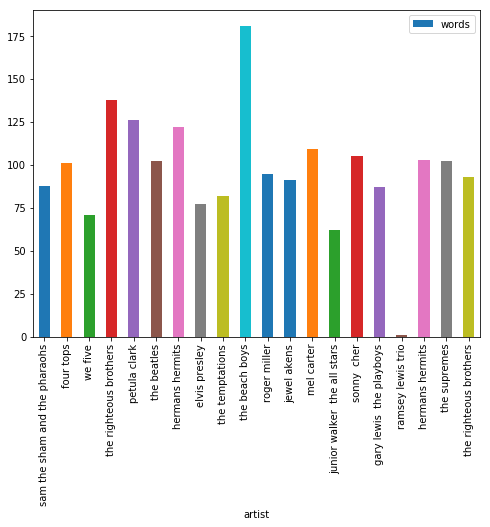

In [18]:
plt.style.use(['fast'])
df.head(20).plot.bar(x='artist',y='words',style='seaborn-talk')
plt.show()

In [ ]:
#adding list to dataframe as column  

In [24]:
plt.rcParams['figure.figsize'] = (50,60)

In [19]:
df['Rank'] = Pd_song_read['Rank']

In [20]:
df['Year'] = (Pd_song_read['Year'])

In [ ]:
#Joining all the lyrics of songs without stop words

In [ ]:
#long_string = ','.join(list(Pd_song_read['Lyrics'].values))

In [22]:
long_string = ''.join(list(str(Pd_song_read['stopword_lyrc'].values)))

In [ ]:
#Word Cloud library to create cloud of words 

In [32]:
!python3 -m pip install --user wordcloud

You are using pip version 9.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [79]:
!python3 --version

Python 3.6.8


In [77]:
import wordcloud

ImportError: cannot import name '_imaging'

In [54]:
!python3 -m pip install --user wordcloud
!python3 -m pip install --user seaborn

     |████████████████████████████████| 163kB 1.7MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [55]:
wordcloud = wordcloud.(background_color="white", max_words=2000, contour_width=5, contour_color='steelblue',width=600,height=800)



SyntaxError: invalid syntax (<ipython-input-55-f0c6b8b89a22>, line 1)

In [40]:
import wordcloud

ImportError: No module named 'wordcloud'

In [14]:

# Generate a word cloud
wordcloud.generate(long_string)


AttributeError: 'module' object has no attribute 'generate'

In [12]:
# Visualize the word cloud
wordcloud.to_image()

AttributeError: 'module' object has no attribute 'to_image'

In [3]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [ ]:
#function to display top 30 comman words used in lyrics

In [186]:
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

In [143]:
Pd_song_read.head(3)

,Rank,Song,Artist,Year,Lyrics,Source,lr,stopword_lyrc
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,"[sam, the, sham, miscellaneous, wooly, bully, ...","[miscellaneous, wooly, bully, wooly, bully, ph..."
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,"[sugar, pie, honey, bunch, you, know, that, i,...","[sugar, pie, honey, bunch, love, cant, help, l..."
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,"[when, i, woke, up, this, morning, you, were, ...","[woke, morning, mind, mind, troubles, whoaoh, ..."


In [187]:
count_vectorizer = CountVectorizer(stop_words=stops)

In [188]:
Pd_song_read['Year'].unique()

array([1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [189]:
df_65_70= Pd_song_read[Pd_song_read['Year'].isin([1965,1966,1967,1968,1969,1970])]
df_71_75 = Pd_song_read[Pd_song_read['Year'].isin([1971,1972,1973,1974,1975])]
df_1967 =  Pd_song_read[Pd_song_read['Year']==1967]
df_1968 = Pd_song_read[Pd_song_read['Year']==1968]

In [196]:
count_65_70 = count_vectorizer.fit_transform(df_65_70['Lyrics'])

In [191]:
count_71_75 = count_vectorizer.fit_transform(df_71_75['Lyrics'])

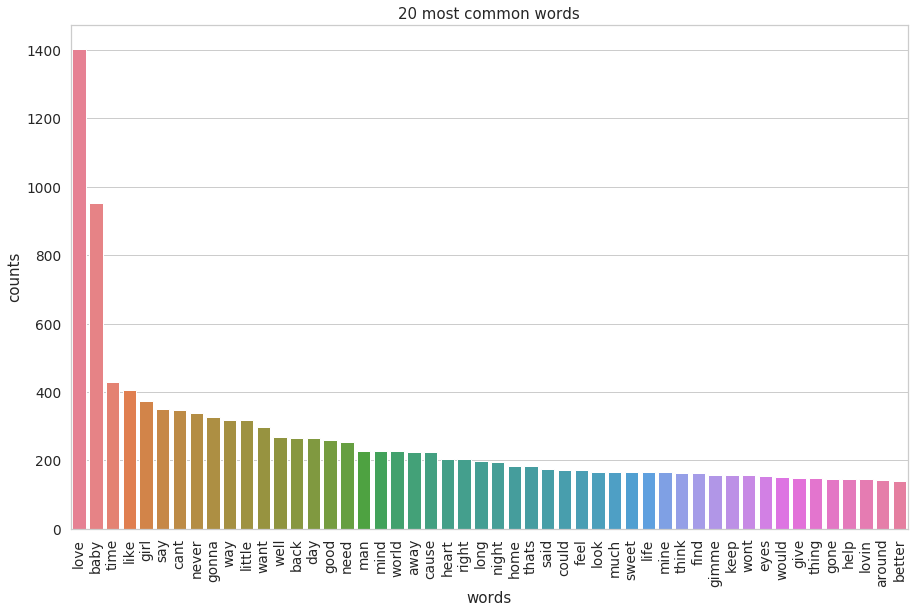

In [197]:
plot_10_most_common_words(count_65_70, count_vectorizer)

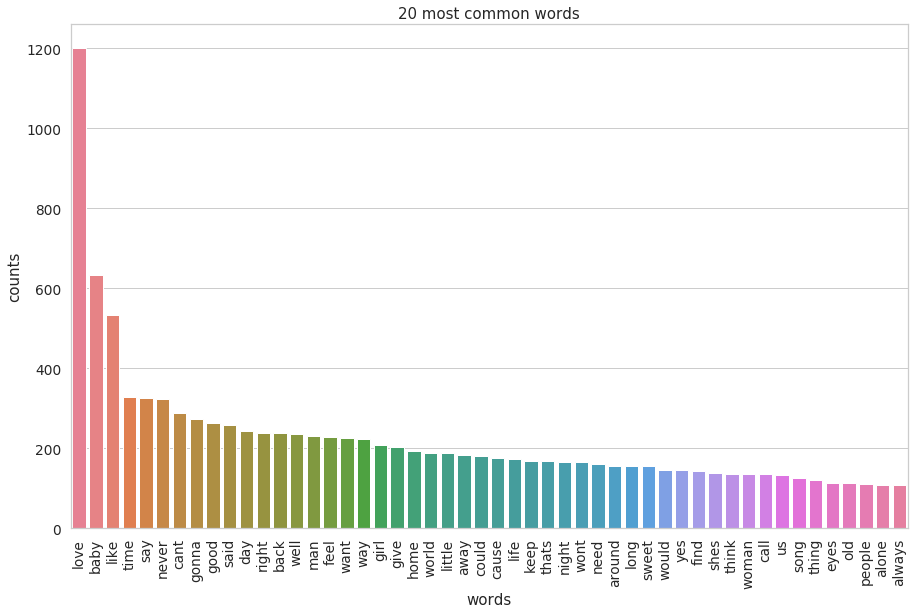

In [194]:
# Visualise the 10 most common words
plot_10_most_common_words(count_71_75, count_vectorizer)

In [ ]:
'ya','get', 'go', 'see', 'one', 'take', 'la','ooh','id','youll','na','theyll','ever','theres','youve'

'us','oo','us','hes','thats','mia','shes','yes'

In [ ]:
print(plt.style.available)

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('vader_lexicon')



In [ ]:
Pd_song_read.stopword_lyrc.iloc[0]

In [ ]:
Pd_song_read[Pd_song_read['Artist']=='the beach boys']

In [56]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

sentences=['sugar',
 'pie',
 'honey',
 'bunch',
 'know',
 'love',
 'cant',
 'help',
 'love',
 'nobody',
 'elsein',
 'life',
 'come',
 'go',
 'leaving',
 'picture',
 'behind',
 'kissed',
 'thousand',
 'timeswhen',
 'snap',
 'finger',
 'wink',
 'eye',
 'come',
 'arunning',
 'im',
 'tied',
 'apron',
 'strings',
 'theres',
 'nothing',
 'docant',
 'help',
 'cant',
 'help',
 'myselfsugar',
 'pie',
 'honey',
 'bunch',
 'im',
 'weaker',
 'man',
 'cant',
 'help',
 'im',
 'fool',
 'love',
 'seewanna',
 'tell',
 'dont',
 'love',
 'tell',
 'ive',
 'tried',
 'every',
 'time',
 'see',
 'face',
 'get',
 'choked',
 'insidewhen',
 'call',
 'name',
 'girl',
 'starts',
 'flame',
 'burning',
 'heart',
 'tearing',
 'apart',
 'matter',
 'try',
 'love',
 'hidecause',
 'sugar',
 'pie',
 'honey',
 'bunch',
 'know',
 'im',
 'weak',
 'cant',
 'help',
 'love',
 'nobody',
 'elsesugar',
 'pie',
 'honey',
 'bunch',
 'anything',
 'ask',
 'cant',
 'help',
 'want',
 'nobody',
 'elsesugar',
 'pie',
 'honey',
 'bunch',
 'know',
 'love',
 'cant',
 'help',
 'cant',
 'help']
for sentence in sentences:
    ss = sid.polarity_scores(sentence) 
print (ss)


{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4019}


In [ ]:
#Using nltk check how much percentage of the lyrics of song is positive, negative and neutral

In [57]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
df = pd.DataFrame(columns=('artist', 'pos', 'neu', 'neg'))
sid = SentimentIntensityAnalyzer()
i=0
for artist in artists:
    num_positive = 0
    num_negative = 0
    num_neutral = 0

    f = open('lyrics/' + artist + '-cleaned', 'rb')
    for sentence in f.readlines():
        this_sentence = sentence.decode('utf-8')
        comp = sid.polarity_scores(this_sentence)
        comp = comp['compound']
        if comp >= 0.5:
            num_positive += 1
        elif comp > -0.5 and comp < 0.5:
            num_neutral += 1
        else:
            num_negative += 1

    num_total = num_negative + num_neutral + num_positive
    percent_negative = (num_negative/float(num_total))*100
    percent_neutral = (num_neutral/float(num_total))*100
    percent_positive = (num_positive/float(num_total))*100
    df.loc[i] = (artist, percent_positive, percent_neutral, percent_negative)
    i+=1
                 
df.plot.bar(x='artist', stacked=True)
plt.show()          

NameError: name 'pd' is not defined

In [ ]:
comp.keys()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
pdf_Label = pd.DataFrame(columns=('artist', 'pos', 'neu', 'neg'))
sid = SentimentIntensityAnalyzer()
i=0
num_positive = 0
num_negative = 0
num_neutral = 0
comp1 = []
for artist in Pd_song_read.Artist.head(500):
    f = Pd_song_read.Lyrics.head(500)
    for sentence in f:
        this_sentence = sentence
        #print(this_sentence)
        comp = sid.polarity_scores(this_sentence)
        comp1.append(comp)
    
      
    
    pdf_Label.loc[i] = (artist)
    i+=1
    
    
#pdf_Label.plot.bar(x='artist', stacked=True)
#plt.show()  
    
        
        #print(num_positive)
        #num_total = num_negative + num_neutral + num_positive
        #print(num_total)
        
        
        
        
    
    
            
            
    

In [ ]:
!pip install holoviews

In [ ]:
#converting list to Pandas Dataframe

In [ ]:
NEW = pd.DataFrame(comp1)

In [ ]:
pdf_Label['neg'] = NEW['neg']
pdf_Label['pos'] = NEW['pos']
#pdf_Label['neu'] = NEW['neu']
#pdf_Label['compound'] = NEW['compound']    

In [ ]:
pdf_Label.count()

In [ ]:
from bokeh.io import show, output_file
from bokeh.plotting import figure

In [ ]:
bars = hv.Bars(pdf_Label)


In [ ]:
pd.

In [ ]:
pdf_Label.plot.bar(x='artist',stacked=True, figsize=(10,7))

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.barplot(x=pdf_Label.artist,y=pdf_Label.neu)

NameError: name 'pdf_Label' is not defined

In [7]:
pdf_Label.plot.bar(x='artist', stacked=True,)
plt.show()

NameError: name 'pdf_Label' is not defined

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
pdf_Label = pd.DataFrame(columns=('artist', 'pos', 'neu', 'neg'))
sid = SentimentIntensityAnalyzer()
i=0
num_positive = 0
num_negative = 0
num_neutral = 0
for artist in Pd_song_read.Artist.head(50):
    f = Pd_song_read.Lyrics.head(50)
    for sentence in f:
        this_sentence = sentence
        #print(this_sentence)
        comp = sid.polarity_scores(this_sentence)
        
        comp1 = comp['compound']
        if comp1 >= 0.5:
            num_positive += 1
        elif comp1 > -0.5 and comp1 < 0.5:
            num_neutral += 1
        else:
            num_negative += 1
   
    print(artist,num_negative,num_neutral,num_positive)
    num_total = num_negative + num_neutral + num_positive
    print(num_total)
    percent_negative = (num_negative/(num_total))*100
    print(percent_negative)
    percent_neutral = (num_neutral/float(num_total))*100
    percent_positive = (num_positive/float(num_total))*100
    #print(artist,percent_negative,percent_negative,percent_positive)
    pdf_Label.loc[i] = (artist, num_positive, num_neutral, num_negative)
    i+=1
    
    
pdf_Label.plot.bar(x='artist', stacked=True)
plt.show()  
    
        
        #print(num_positive)
        #num_total = num_negative + num_neutral + num_positive
        #print(num_total)
        
        
        
        
    
    
            

In [ ]:
(12/60)*100

In [ ]:
pdf_Label

In [ ]:
for artist in Pd_song_read.Artist.head(10):
    print(artist)

In [ ]:
this_sentence

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
pdf_Label = pd.DataFrame(columns=('artist', 'pos', 'neu', 'neg'))
sid = SentimentIntensityAnalyzer()
i=0
for artist in Pd_song_read.Artist:
    num_positive = 0
    num_negative = 0
    num_neutral = 0
    
    f = Pd_song_read.Lyrics
    for sentence in f:
        this_sentence = sentence
        comp = sid.polarity_scores(this_sentence)
        comp = comp['compound']
        if comp >= 0.5:
            num_positive += 1
        elif comp > -0.5 and comp < 0.5:
            num_neutral += 1
        else:
            num_negative += 1
            
    num_total = num_negative + num_neutral + num_positive
    percent_negative = (num_negative/float(num_total))*100
    percent_neutral = (num_neutral/float(num_total))*100
    percent_positive = (num_positive/float(num_total))*100
    pdf_Label.loc[i] = (artist, percent_positive, percent_neutral, percent_negative)
    i+=1
    
pdf_Label.head(20).plot.bar(x='artist', stacked=True)
plt.show()          


In [ ]:
num_positive=[]
for i in range(2):
    num_positive =+1

In [ ]:
num_positive

In [ ]:
num_words_this

In [ ]:
pdf_Label

In [ ]:
num_words

In [ ]:
for artist in artists:
    f = open('lyrics/' + artist + '-cleaned', 'rb')
    all_words = ''
    num_words = 0
    raw_text = ""
    for sentence in f.readlines():
        this_sentence = sentence.decode('utf-8')
        raw_text += this_sentence
            
    words = raw_text.split(" ")
    filtered_words = [word for word in words if word not in stopwords.words('english') and len(word) > 1 and word not in ['na','la']] # remove the stopwords
    
    a = len(set(filtered_words))
    b = len(words)
    df.loc[i] = (artist, (a/float(b))*100)
    i+=1
    


## Reading dataset with Genre

In [59]:
Lyrics_Genre = pd.read_csv('lyrics 3.csv')

In [60]:
lyric_filtered = Lyrics_Genre.head(30000)

In [61]:
lyric_filtered.head(2)

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."


In [69]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
# cleaning text

In [63]:
lyric_filtered['lyrics'] = [x.strip('.\n') for x in lyric_filtered['lyrics'].astype('str')]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
lyric_filtered.drop(columns=['index'],inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## setting the lyrics in lower string format

In [65]:
lyric_filtered['llr'] = lyric_filtered['lyrics'].str.lower()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Replacing Extra Character

In [66]:
lyric_filtered['lyrics'] = lyric_filtered['lyrics'].str.replace('[^\w\s\n]','')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Replacing Digits

In [67]:

lyric_filtered['lyrics'] = lyric_filtered['lyrics'].str.replace('\d+','')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
lyric_filtered.head()

,song,year,artist,genre,lyrics,llr
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...","oh baby, how you doing?\nyou know i'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...","playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,if you search\nfor tenderness\nit isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...","oh oh oh i, oh oh oh i\n[verse 1:]\nif i wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...","party the people, the people the party it's po..."


## Tokenizing the lyrics

In [70]:
def identify_tokens(row):
    Lyrics = row['llr']
    tokens = nltk.word_tokenize(Lyrics)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

lyric_filtered['llr'] = lyric_filtered.apply(identify_tokens, axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [71]:
lyric_filtered['lyrics'] = lyric_filtered['lyrics'].str.strip('\n')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
lyric_filtered.count()

song      30000
year      30000
artist    30000
genre     30000
lyrics    30000
llr       30000
dtype: int64

## Removing Stop Words

In [197]:
stops = set(nltk.corpus.stopwords.words("english"))
t = ('ive','youre','verse','im','yo','oh','Oh','yea','ah','sham',
     'if','If','For','Then','It','isnt','Im','sam','mrs','yea',
     'sloopy','hey','mr','woah','aint','yah','Verse','uhuh','im',
     'dont', 'know','just', 'got', 'yeah','make','let','come','wanna',
     'ill','aint','tell','ya','get', 'go','see', 'one', 'take', 'la',
     'ooh','id','youll','na','theyll','ever','theres','youve','I','i',
     'Ay','Hello','hello','ca','is','the','ai','gon','que','wan','wo','chorus')
stops.update(t)


def remove_stops(row):
    my_list = row['llr']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

lyric_filtered['llr'] = lyric_filtered.apply(remove_stops, axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [75]:
lyric_filtered.head()

,song,year,artist,genre,lyrics,llr
0,ego-remix,2009,beyonce-knowles,Pop,Oh baby how you doing\nYou know Im gonna cut r...,"[baby, gon, cut, right, chase, women, made, li..."
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy\nits like you seem s...,"[playin, everything, easy, like, seem, sure, s..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isnt hard to...,"[search, tenderness, hard, find, love, need, l..."
3,you-are-my-rock,2009,beyonce-knowles,Pop,Oh oh oh I oh oh oh I\nVerse \nIf I wrote a bo...,"[wrote, book, stand, title, book, would, life,..."
4,black-culture,2009,beyonce-knowles,Pop,Party the people the people the party its popp...,"[party, people, people, party, popping, sittin..."


## Drop songs with na fields

In [198]:
Lyrics_Genre.dropna(inplace = True)

## Filtering lyrincs having length more than or equal to  20

In [199]:
lyric_more = lyric_filtered[lyric_filtered['lyrics'].str.len() >= 10]

## Saving the Clean Dataset

In [79]:
lyric_more.to_csv('CleanedData.csv')

In [80]:
pd.read_csv('CleanedData.csv')

,Unnamed: 0,song,year,artist,genre,lyrics,llr
0,0,ego-remix,2009,beyonce-knowles,Pop,Oh baby how you doing\nYou know Im gonna cut r...,"['baby', 'gon', 'cut', 'right', 'chase', 'wome..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy\nits like you seem s...,"['playin', 'everything', 'easy', 'like', 'seem..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isnt hard to...,"['search', 'tenderness', 'hard', 'find', 'love..."
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,Oh oh oh I oh oh oh I\nVerse \nIf I wrote a bo...,"['wrote', 'book', 'stand', 'title', 'book', 'w..."
4,4,black-culture,2009,beyonce-knowles,Pop,Party the people the people the party its popp...,"['party', 'people', 'people', 'party', 'poppin..."
5,5,all-i-could-do-was-cry,2009,beyonce-knowles,Pop,I heard\nChurch bells ringing\nI heard\nA choi...,"['heard', 'church', 'bells', 'ringing', 'heard..."
6,6,once-in-a-lifetime,2009,beyonce-knowles,Pop,This is just another day that I would spend\nW...,"['another', 'day', 'would', 'spend', 'waitin',..."
7,7,waiting,2009,beyonce-knowles,Pop,Waiting waiting waiting waiting\nWaiting waiti...,"['waiting', 'waiting', 'waiting', 'waiting', '..."
8,8,slow-love,2009,beyonce-knowles,Pop,Verse \nI read all of the magazines\nwhile wai...,"['read', 'magazines', 'waiting', 'around', 'sa..."
9,9,why-don-t-you-love-me,2009,beyonce-knowles,Pop,Nnnow honey\nYou better sit down and look arou...,"['honey', 'better', 'sit', 'look', 'around', '..."


## Drop the songds with Genre not Available
    
    Filter the songs from 2001 to 2016

In [81]:
lyric_more = lyric_more[lyric_more.genre !='Not Available']
lyric_more = lyric_more[lyric_more['year'].isin(['2001','2002','2003','2004','2005','2006','2007',
                                                 '2008','2009','2010','2011','2012','2013','2014','2015'
                                                '2016']) ]

In [124]:
lyric_more

,song,year,artist,genre,lyrics,llr
0,ego-remix,2009,beyonce-knowles,Pop,Oh baby how you doing\nYou know Im gonna cut r...,"[baby, gon, cut, right, chase, women, made, li..."
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy\nits like you seem s...,"[playin, everything, easy, like, seem, sure, s..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isnt hard to...,"[search, tenderness, hard, find, love, need, l..."
3,you-are-my-rock,2009,beyonce-knowles,Pop,Oh oh oh I oh oh oh I\nVerse \nIf I wrote a bo...,"[wrote, book, stand, title, book, would, life,..."
4,black-culture,2009,beyonce-knowles,Pop,Party the people the people the party its popp...,"[party, people, people, party, popping, sittin..."
5,all-i-could-do-was-cry,2009,beyonce-knowles,Pop,I heard\nChurch bells ringing\nI heard\nA choi...,"[heard, church, bells, ringing, heard, choir, ..."
6,once-in-a-lifetime,2009,beyonce-knowles,Pop,This is just another day that I would spend\nW...,"[another, day, would, spend, waitin, right, st..."
7,waiting,2009,beyonce-knowles,Pop,Waiting waiting waiting waiting\nWaiting waiti...,"[waiting, waiting, waiting, waiting, waiting, ..."
8,slow-love,2009,beyonce-knowles,Pop,Verse \nI read all of the magazines\nwhile wai...,"[read, magazines, waiting, around, said, could..."
9,why-don-t-you-love-me,2009,beyonce-knowles,Pop,Nnnow honey\nYou better sit down and look arou...,"[honey, better, sit, look, around, must, bumpe..."


In [85]:
import seaborn as sns


## Famous Genre of the Music

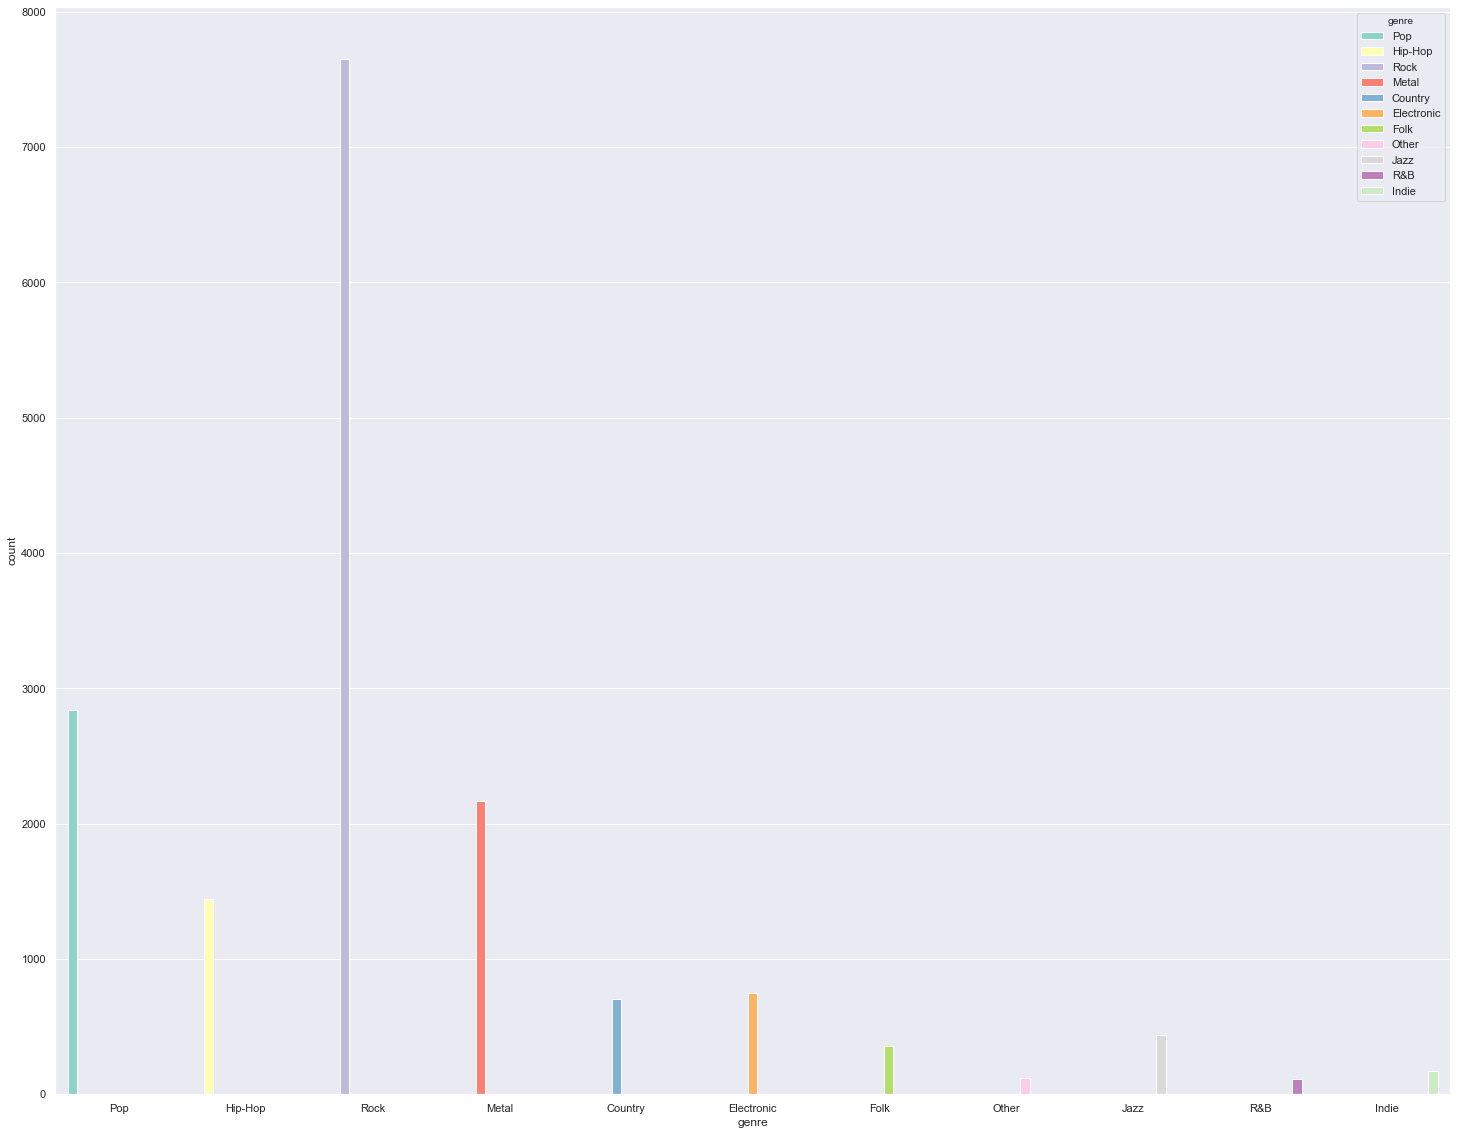

In [93]:
pp = sns.countplot(x='genre',hue='genre',data=lyric_more,palette="Set3",saturation=1)
sns.set(rc={'figure.figsize':(25,20)})

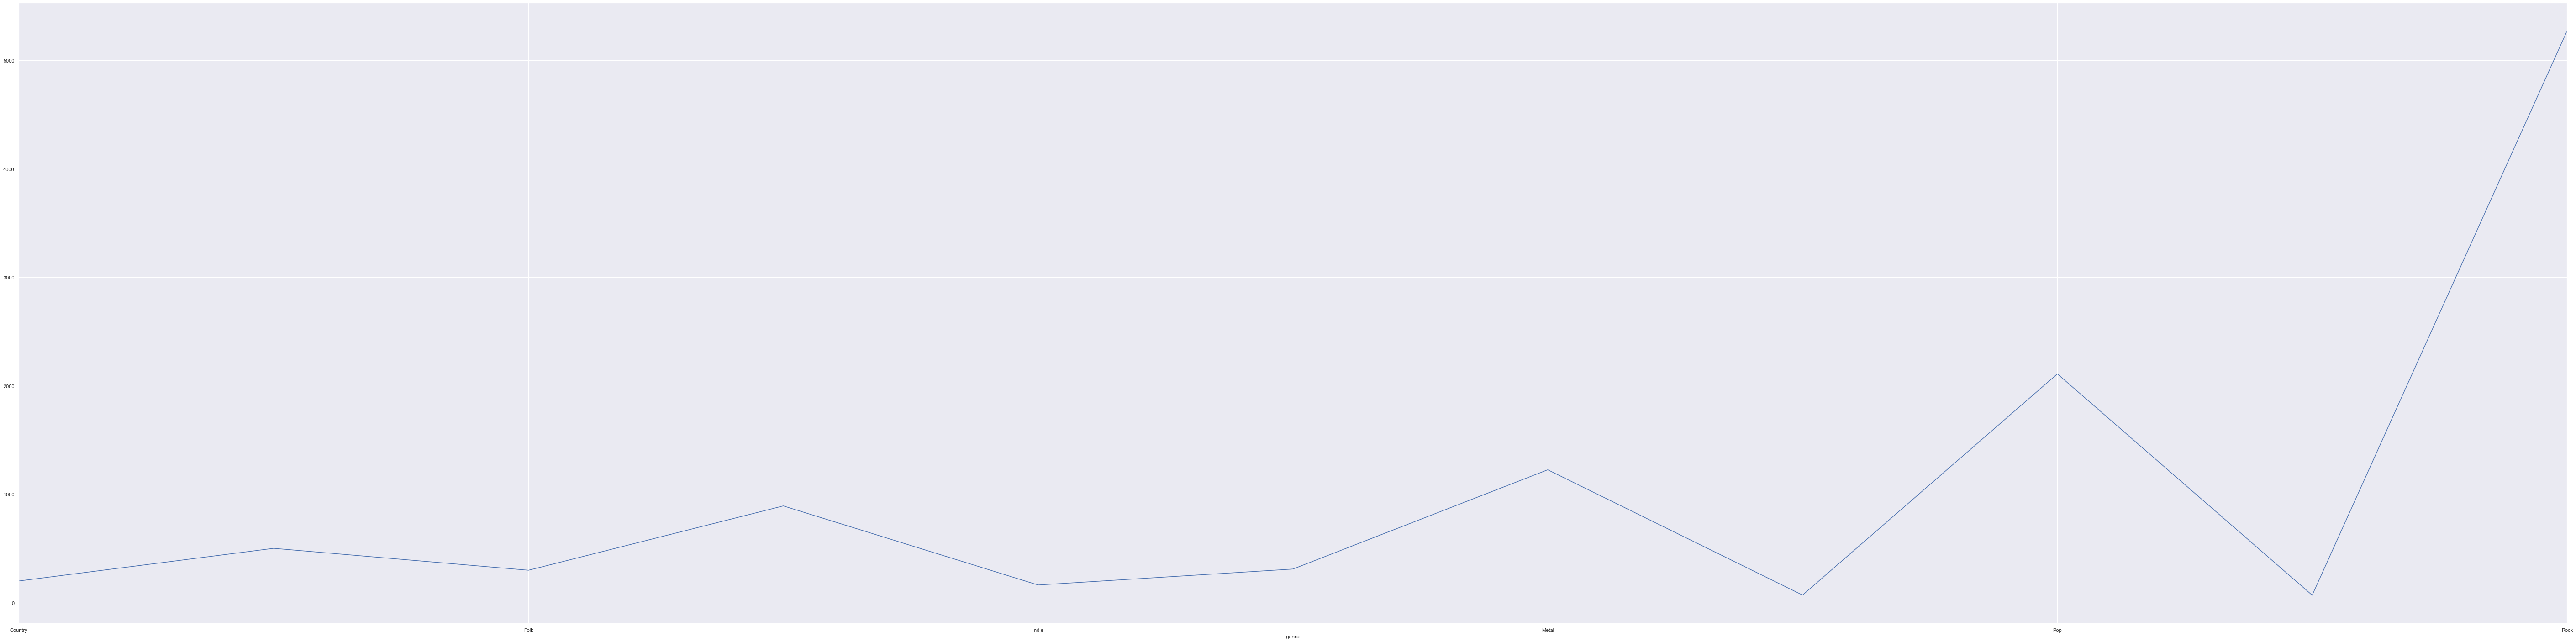

In [164]:
(lyric_more.groupby(['genre']).count()['song']).plot.line()

In [95]:

lyric_gnre_year =(lyric_more.groupby(['genre','year']).count()['song']).to_frame()

In [96]:
lyric_gnre_year

song
genre      year      
Country    2001     1
           2006    19
           2007   489
           2008   112
           2009    34
           2010     5
           2011     9
           2012    18
           2013     7
           2014    12
Electronic 2001    14
           2002    12
           2003     4
           2005    12
           2006   185
           2007   129
           2008    67
           2009    26
           2010    96
           2011    49
           2012    38
           2013    53
           2014    67
Folk       2001    14
           2002    17
           2005    29
           2006    57
           2007    78
           2008    45
           2009    22
...               ...
Pop        2008   310
           2009   275
           2010   107
           2011   202
           2012   218
           2013   193
           2014   278
R&B        2006    10
           2007    26
           2008    36
           2009     4
           2010     5
           2011    17
           2012     4
           2013    12
           2014     2
Rock       2001    56
           2002    71
           2003    34
           2004    80
           2005   231
           2006  2434
           2007  2536
           2008   745
           2009   322
           2010   326
           2011   115
           2012   244
           2013   204
           2014   255

[123 rows x 1 columns]

In [97]:
l= lyric_gnre_year.reset_index()

## Count of song per genre and Year

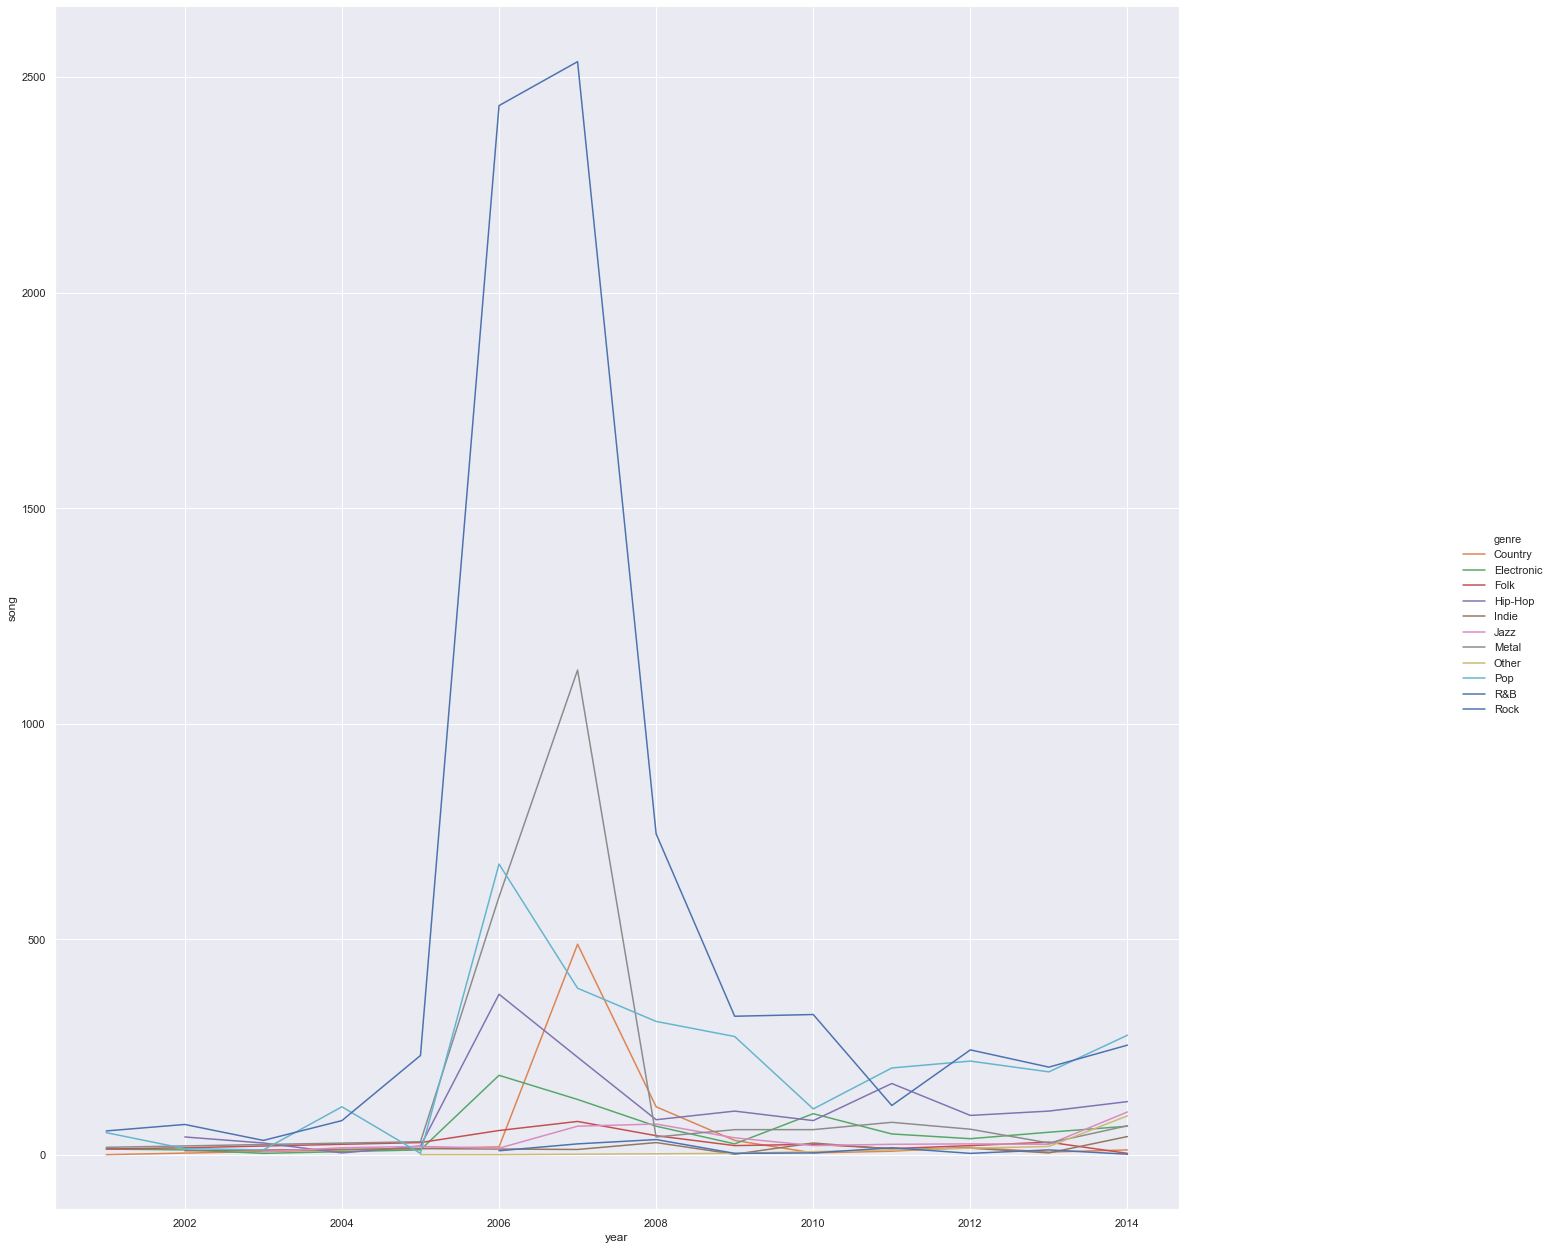

In [98]:
import seaborn as sns
palette ={"Rock":"C0","Country":"C1","Electronic":"C2","Folk":"C3","Hip-Hop":"C4","Indie":"C5",
         "Jazz":"C6","Metal":"C7","Other":"C8","Pop":"C9","R&B":"C10"}
sns.set(font_scale=1)
#sns.set(rc={'figure.figsize':(100,25)})
g=sns.relplot(x="year", y="song", hue="genre",kind='line', data=l, palette=palette)
g.fig.set_figheight(20)
g.fig.set_figwidth(25)



## Checking the length of each song 

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

df = pd.DataFrame(columns=('artist', 'words'))
i=0
for artist in lyric_more.song:
    f = lyric_more.llr
    num_words = []
    all_text = ''
    for sentence in f:
        this_sentence = sentence
        num_words_this = len(this_sentence)
        num_words.append(num_words_this) 
     
    df.loc[i] = (artist)
    i+=1

In [115]:
df['words']=num_words

In [116]:
df['genre'] = lyric_more['genre']

In [117]:
df.dropna(inplace=True)

In [123]:
df

,artist,words,genre
0,ego-remix,164,Pop
1,then-tell-me,97,Pop
2,honesty,67,Pop
3,you-are-my-rock,182,Pop
4,black-culture,114,Pop
5,all-i-could-do-was-cry,59,Pop
6,once-in-a-lifetime,100,Pop
7,waiting,178,Pop
8,slow-love,210,Pop
9,why-don-t-you-love-me,114,Pop


## Length of song per genre

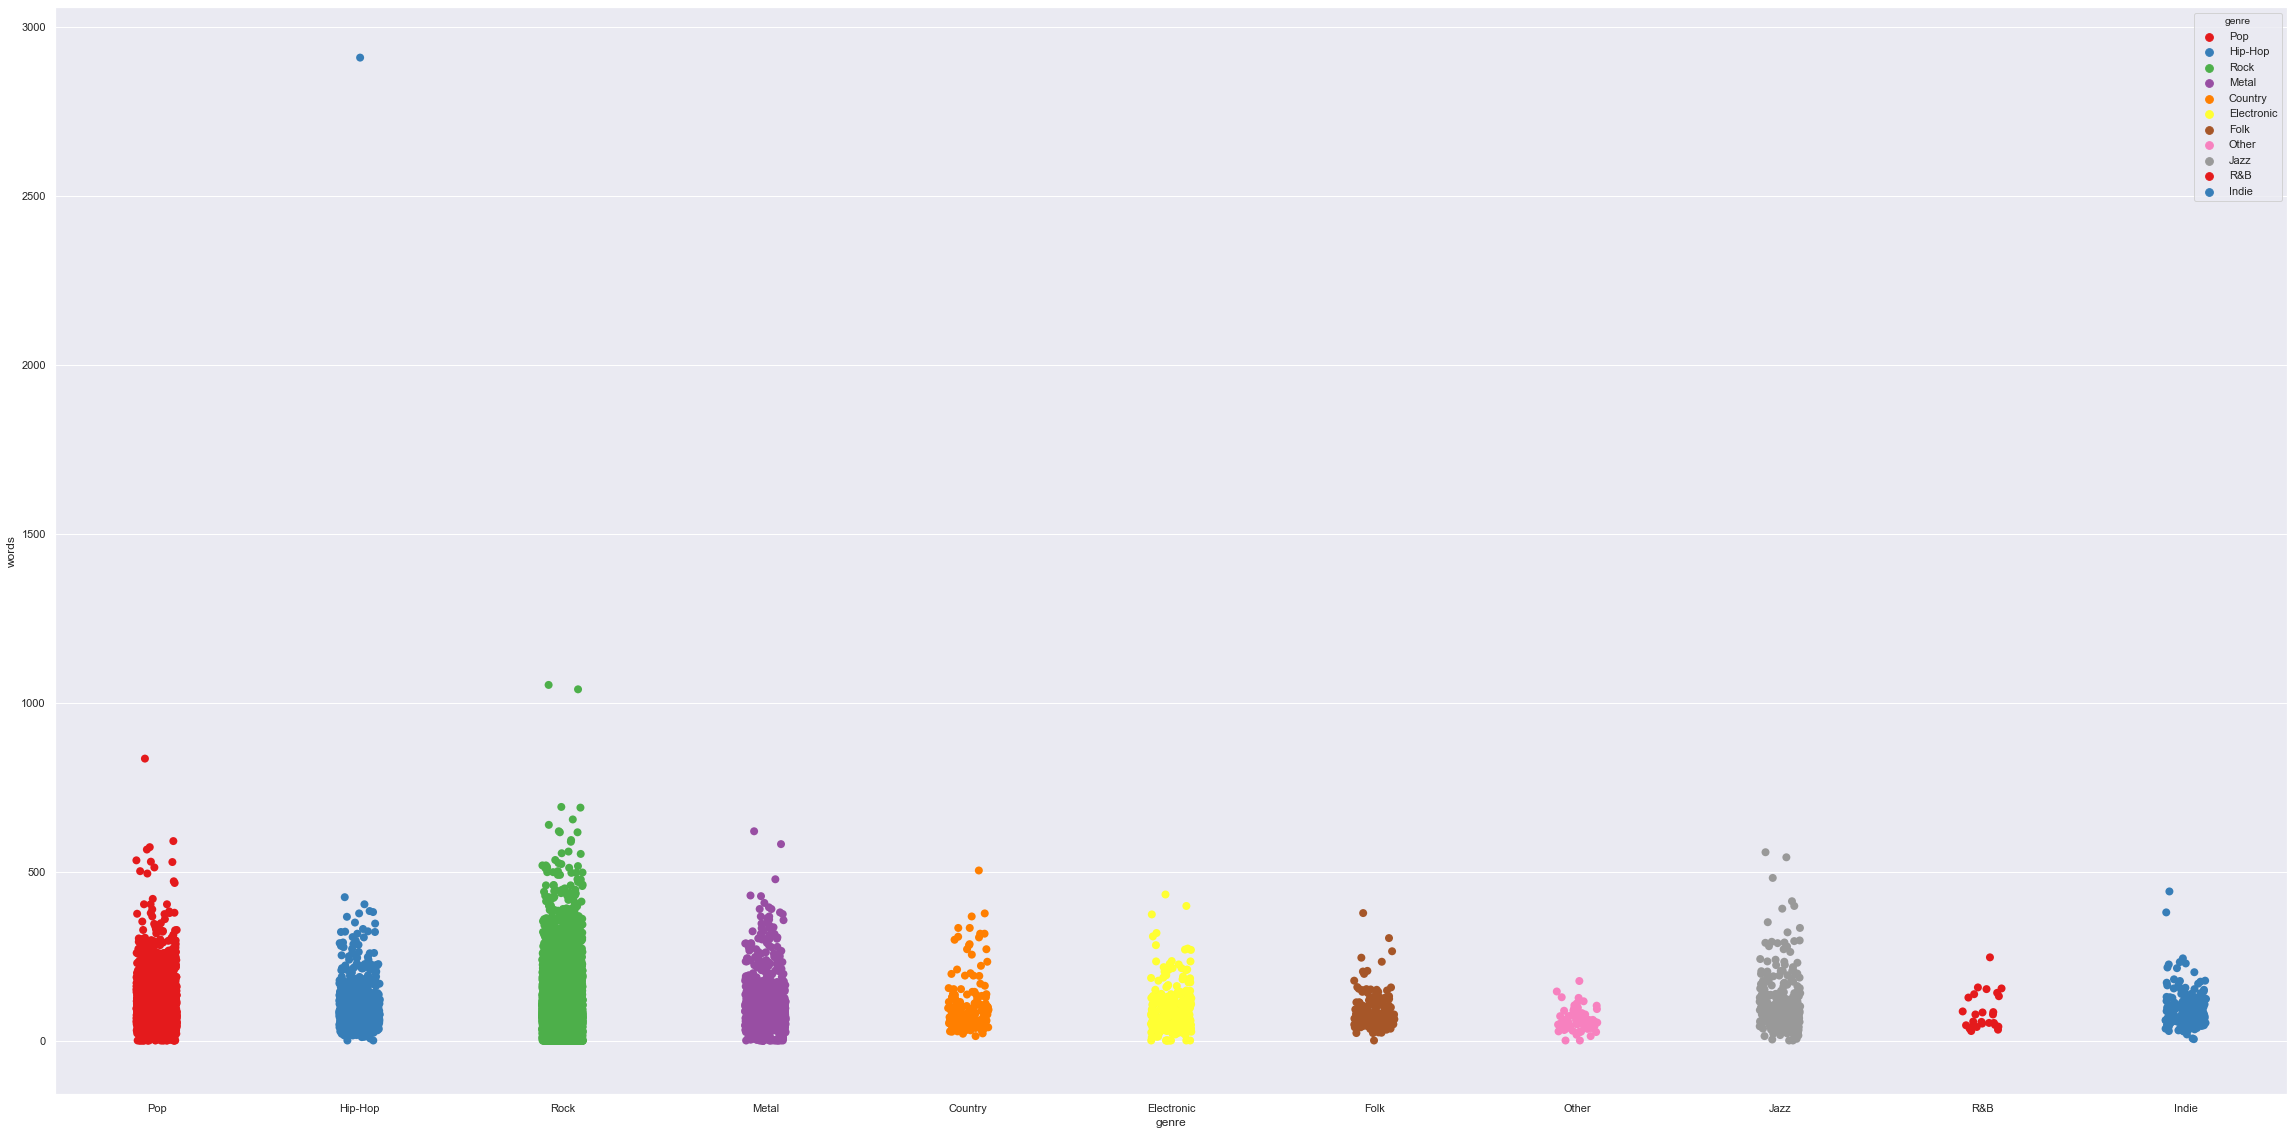

In [119]:
fig, ax = plt.subplots(figsize=(40,20))
palette ={"Rock":"C0","Country":"C1","Electronic":"C2","Folk":"C3","Hip-Hop":"C4","Indie":"C5",
         "Jazz":"C6","Metal":"C7","Other":"C8","Pop":"C9","R&B":"C10"}
sns.stripplot(x='genre',y='words',hue='genre',data=df,palette="Set1",size=8,jitter=True,dodge=False,ax=ax)


genre
Country       AxesSubplot(0.125,0.125;0.775x0.755)
Electronic    AxesSubplot(0.125,0.125;0.775x0.755)
Folk          AxesSubplot(0.125,0.125;0.775x0.755)
Hip-Hop       AxesSubplot(0.125,0.125;0.775x0.755)
Indie         AxesSubplot(0.125,0.125;0.775x0.755)
Jazz          AxesSubplot(0.125,0.125;0.775x0.755)
Metal         AxesSubplot(0.125,0.125;0.775x0.755)
Other         AxesSubplot(0.125,0.125;0.775x0.755)
Pop           AxesSubplot(0.125,0.125;0.775x0.755)
R&B           AxesSubplot(0.125,0.125;0.775x0.755)
Rock          AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

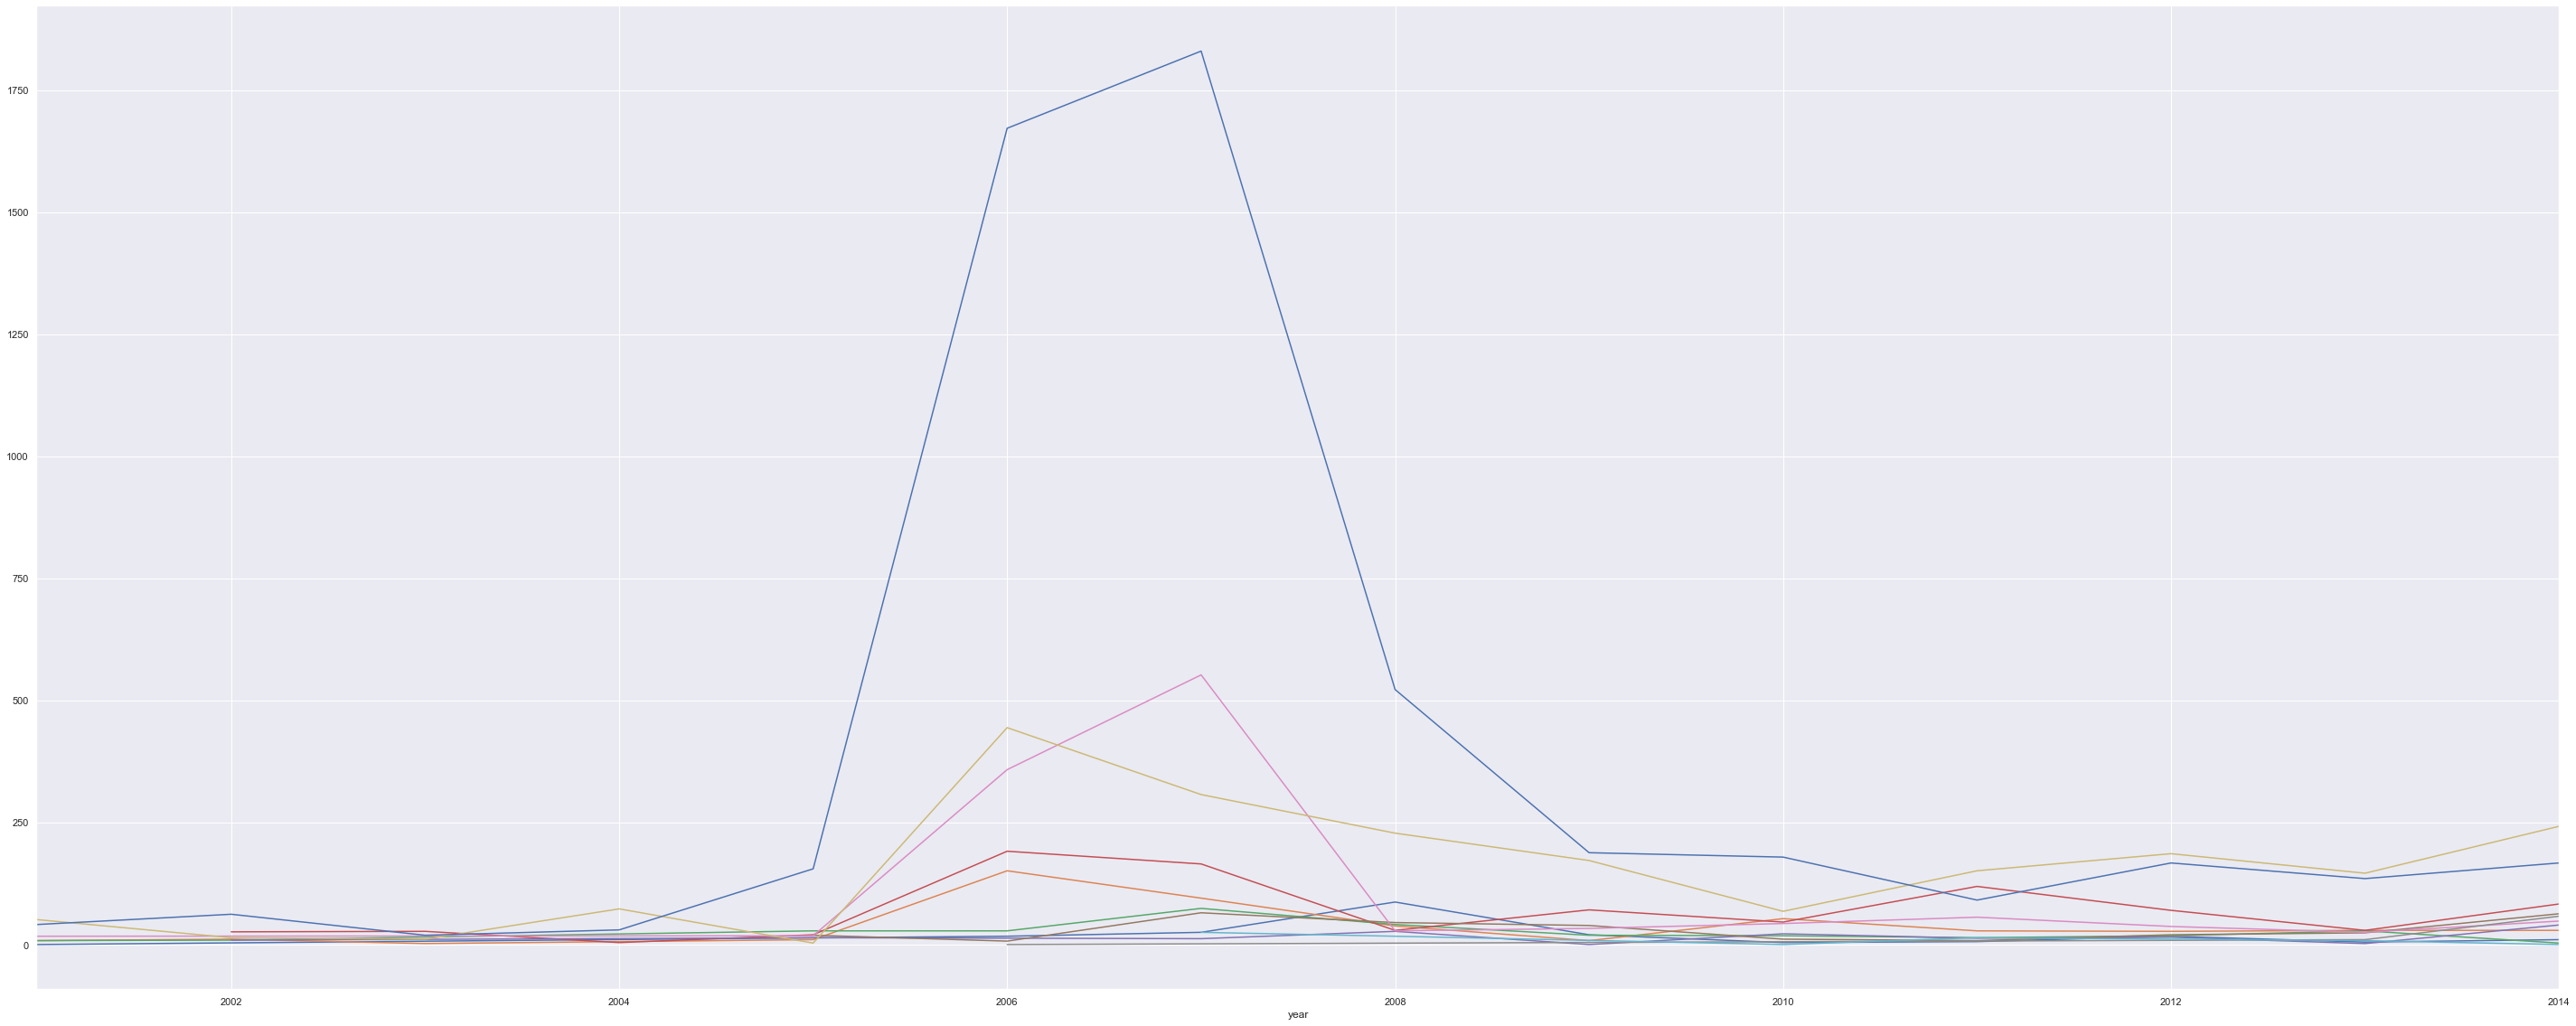

In [135]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,20)
plt.rcParams['axes.linewidth'] = 0.4
fig, ax=plt.subplots()
l.groupby('genre').plot(x='year',y='song',legend=False,ax=ax)

In [186]:
df_top5.transpose()

genre  Rock       Metal Rock  Pop Metal  Pop           Hip-Hop  ... Country  \
year   2007  2006  2007 2008 2006  2006 2007 2014 2008    2006  ...    2010   
song   1830  1672   553  523  445   359  308  243  229     192  ...       5   

genre Folk  Pop Indie Electronic  R&B      Other Indie Country  
year  2014 2005  2013       2003 2014 2010  2006  2009    2001  
song     4    4     3          3    1    1     1     1       1  

[1 rows x 116 columns]

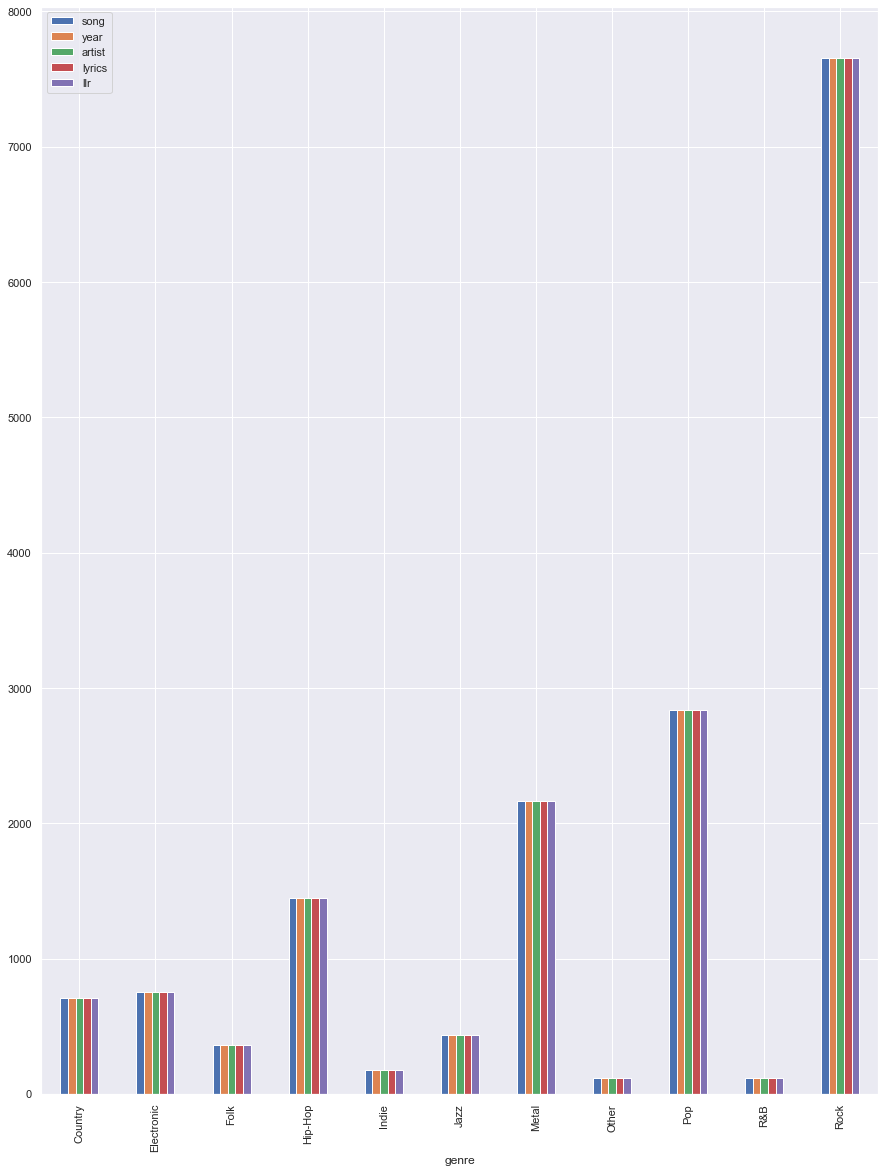

In [120]:
lyric_more.groupby(['genre']).count().plot(kind='bar',figsize=(15,20))

In [245]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [252]:
pop_lyric =lyric_more[lyric_more['genre']== "Pop"]
Rock_lyric = lyric_more[lyric_more['genre']== "Rock"]
hip_lyric = lyric_more[lyric_more['genre']== "Hip-Hop"]
Metal_lyric = lyric_more[lyric_more['genre']== "Metal"]
Indie_lyric = lyric_more[lyric_more['genre']== "Indie"]
Country_lyric = lyric_more[lyric_more['genre']== "Country"]
jazz_lyric = lyric_more[lyric_more['genre']== "Jazz"]


In [250]:
lyric_more.genre.unique()

array(['Pop', 'Hip-Hop', 'Not Available', 'Rock', 'Metal', 'Other',
       'Country', 'Jazz', 'Electronic', 'Folk', 'R&B', 'Indie'],
      dtype=object)

In [291]:
Pop = ''
Rock =''
HipHop =''
Metal = ''
Indie = ''
Country =''
Jazz = ''

In [324]:
def wordC(data):
    global Rock
    global Pop
    global HipHop
    global Metal
    global Indie
    global Country
    global Jazz
    for index, row in data.iterrows():
        ala=row['llr']
        str1=' '.join(ala)
        #Pop = str1 +' '+ Pop
        #Rock = str1 +' '+ Rock
        #HipHop = str1 +' '+ HipHop
        #Metal = str1 +' '+ Metal
        #Indie = str1 +' '+ Indie
        #Country = str1 +' '+ Country
        Jazz = str1 +' '+ Jazz

In [325]:
wordC(jazz_lyric)


In [207]:
lyric_more.head()

,song,year,artist,genre,lyrics,llr
0,ego-remix,2009,beyonce-knowles,Pop,Oh baby how you doing\nYou know Im gonna cut r...,"[baby, cut, right, chase, women, made, like, t..."
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy\nits like you seem s...,"[playin, everything, easy, like, seem, sure, s..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isnt hard to...,"[search, tenderness, hard, find, love, need, l..."
3,you-are-my-rock,2009,beyonce-knowles,Pop,Oh oh oh I oh oh oh I\nVerse \nIf I wrote a bo...,"[wrote, book, stand, title, book, would, life,..."
4,black-culture,2009,beyonce-knowles,Pop,Party the people the people the party its popp...,"[party, people, people, party, popping, sittin..."


In [326]:
len(Jazz)


284465

In [241]:
wordcloud = WordCloud(background_color="white", max_words=2000, 
                     contour_width=5, contour_color='steelblue',width=400,height=400,relative_scaling=0.3)

## POP MUSIC WORDS USED

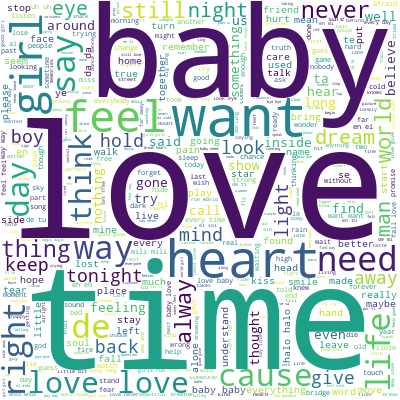

In [303]:
wordcloud.generate(Pop)
wordcloud.to_image()


## ROCK MUSIC WORDS USED

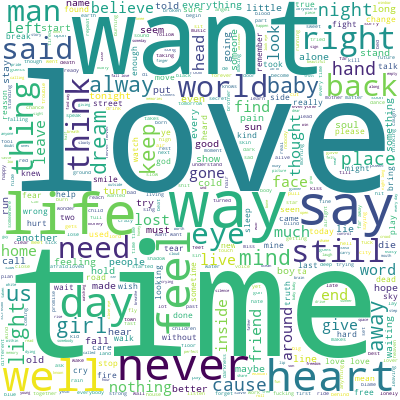

In [305]:
wordcloud.generate(Rock)
wordcloud.to_image()

## HIP HOP MUSIC WORDS USED 

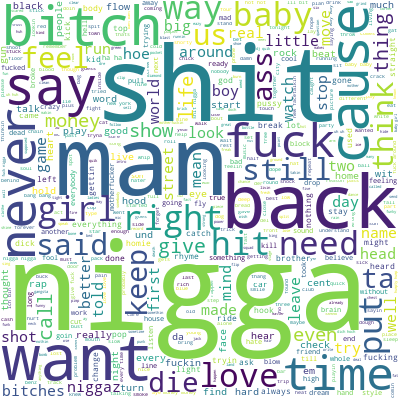

In [309]:
wordcloud.generate(HipHop)
wordcloud.to_image()

In [313]:
## Metal Music Words USed

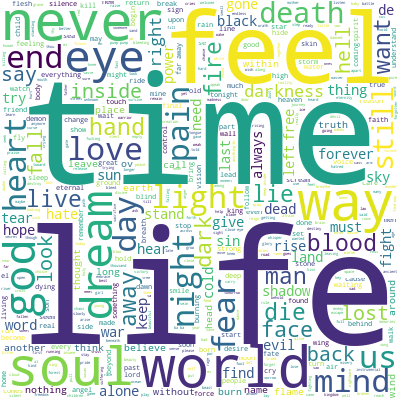

In [315]:
wordcloud.generate(Metal)
wordcloud.to_image()

In [ ]:
## Indie Music Words Used

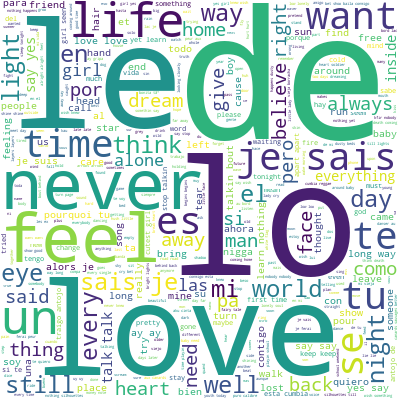

In [319]:
wordcloud.generate(Indie)
wordcloud.to_image()

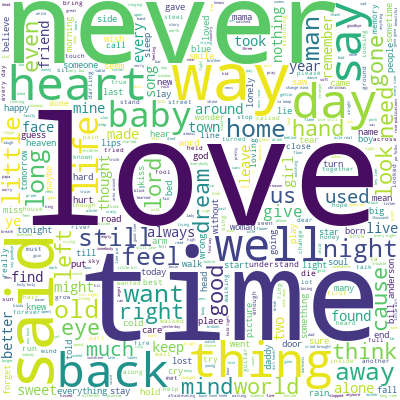

In [323]:

wordcloud.generate(Country)
wordcloud.to_image()

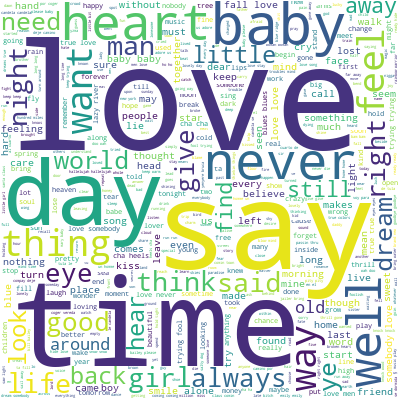

In [327]:

wordcloud.generate(Jazz)
wordcloud.to_image()

In [285]:
wordcloud.generate(Rock)
wordcloud.generate(HipHop)
wordcloud.generate(Metal)
wordcloud.generate(Country)
wordcloud.generate(Jazz)
wordcloud.generate(Indie)

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [200]:
def plot_30_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='30 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

In [201]:
df2 = pd.DataFrame(columns=('lr','w'))

In [202]:
num_wrd = []
for index, row in lyric_more.iterrows():
    al=row['llr']
    fullStr=' '.join(al)
    num_wrd.append(fullStr)
    


In [203]:
df2['lr'] = num_wrd

In [204]:
count_vectorizer = CountVectorizer(stop_words='english')

In [205]:
count_data = count_vectorizer.fit_transform(df2['lr'])

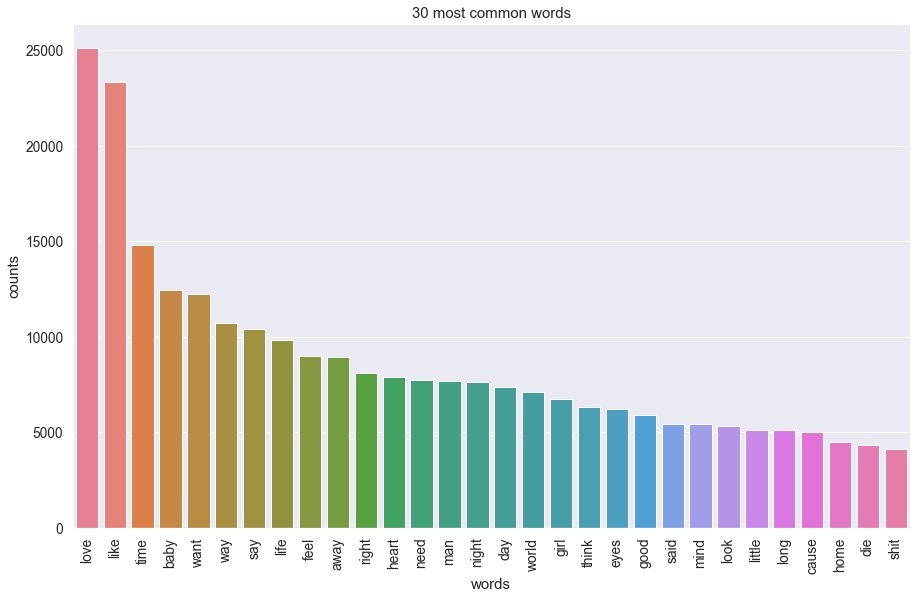

In [206]:
plot_30_most_common_words(count_data, count_vectorizer)

In [173]:
lyric_more.llr 

0        [baby, gon, cut, right, chase, women, made, li...
1        [playin, everything, easy, like, seem, sure, s...
2        [search, tenderness, hard, find, love, need, l...
3        [wrote, book, stand, title, book, would, life,...
4        [party, people, people, party, popping, sittin...
5        [heard, church, bells, ringing, heard, choir, ...
6        [another, day, would, spend, waitin, right, st...
7        [waiting, waiting, waiting, waiting, waiting, ...
8        [read, magazines, waiting, around, said, could...
9        [honey, better, sit, look, around, must, bumpe...
10       [lay, alone, awake, night, sorrow, fills, eyes...
11       [hello, hello, baby, called, ca, hear, thing, ...
12       [feels, like, losing, mind, love, hard, find, ...
13       [everything, thought, never, nothing, like, th...
14       [ta, give, quite, storm, rages, inside, way, h...
15       [really, hurts, say, yes, sweet, love, ai, eno...
16       [bad, clearly, something, good, could, loving,.

In [190]:
df2 = pd.DataFrame(columns=('lr','w'))

In [191]:
df2

,lr,w
